## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 8
---------------------------------------

GOALS:

1. Load data into Python that you find online
2. Understand data types and fix some errors
3. Find your own data to play with

----------------------------------------------------------

This homework has **5 questions** and **1 problem**.

NOTE: Be kind to yourself. Working with data can be hard! Every data set is different. **Seriously** come get help! Come to lab!


In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

## Try reading in some data - csv

Go to the [Cal Fire Website](https://www.fire.ca.gov/incidents) and scroll to the bottom to see the Incident Data. We will download the file named **ALL DATA AS CSV** this should put the data file into your Downloads folder. 

Next you need to move the file **mapdataall.csv** from your Downloads folder into your Day8 folder where you are doing your homework. You can open your Downloads folder and drag the file into JupyterLab side bar. Then I can run the command

    DF_raw = pd.read_csv('mapdataall.csv')

to load the data and look at the data frame.

**Q1** How many variables and observations?

**Q2** How many different incident types are there?

**Q3** Make a histogram of the acres burned and color the bars by whether or not the incident was a calfire incident. You will probably need to make a mask to remove very small and very large fires. How many fires burned more than 100,000 acres? What is the largest fire in the data?

**Extra Q** EXTRA - CHALLENGE - See if you can create a graph that answers the question: Are fires getting bigger or more frequent over time? You get complete creative control on how to answer this question!

In [13]:
DF_raw = pd.read_csv('mapdataall.csv')
DF_raw

,incident_name,incident_is_final,incident_date_last_update,incident_date_created,incident_administrative_unit,incident_administrative_unit_url,incident_county,incident_location,incident_acres_burned,incident_containment,...,incident_latitude,incident_type,incident_id,incident_url,incident_date_extinguished,incident_dateonly_extinguished,incident_dateonly_created,is_active,calfire_incident,notification_desired
0,Bridge Fire,Y,2018-01-09T13:46:00Z,2017-10-31T11:22:00Z,Shasta-Trinity National Forest,NaN,Shasta,"I-5 and Turntable Bay, 7 miles NE of Shasta Lake",37.0,100.0,...,40.774000,NaN,2ca11d45-8139-4c16-8af0-880d99b21e82,https://www.fire.ca.gov/incidents/2017/10/31/b...,2018-01-09T13:46:00Z,2018-01-09,2017-10-31,N,False,False
1,Pala Fire,Y,2020-09-16T14:07:35Z,2009-05-24T14:56:00Z,CAL FIRE San Diego Unit,NaN,San Diego,"Hwy 76 and Pala Temecula, northwest of Pala",122.0,100.0,...,1.000000,Wildfire,8f61f461-552d-4538-b186-35ab030da416,https://www.fire.ca.gov/incidents/2009/5/24/pa...,2009-05-25T00:00:00Z,2009-05-25,2009-05-24,N,True,False
2,River Fire,Y,2022-10-24T11:39:23Z,2013-02-24T08:16:00Z,CAL FIRE San Bernardino Unit,NaN,Inyo,"south of Narrow Gauge Rd & north of Hwy 136, e...",407.0,100.0,...,36.602575,NaN,094719ba-a47b-4abb-9ec5-a506b2b9fd23,https://www.fire.ca.gov/incidents/2013/2/24/ri...,2013-02-28T20:00:00Z,2013-02-28,2013-02-24,N,True,False
3,Fawnskin Fire,Y,2013-04-22T09:00:00Z,2013-04-20T17:30:00Z,San Bernardino National Forest,NaN,San Bernardino,"west of Delamar Mountain, north of the communi...",30.0,100.0,...,34.288877,NaN,58f89ff8-bd3e-4355-b1c0-8fa05c747d3f,https://www.fire.ca.gov/incidents/2013/4/20/fa...,2013-04-22T09:00:00Z,2013-04-22,2013-04-20,N,False,False
4,Gold Fire,Y,2013-05-01T07:00:00Z,2013-04-30T12:59:00Z,CAL FIRE Madera-Mariposa-Merced Unit,NaN,Madera,Between Road 210 and Road 200 near Fine Gold C...,274.0,100.0,...,37.116295,NaN,357ffc13-bef9-48eb-810f-c5de851972eb,https://www.fire.ca.gov/incidents/2013/4/30/go...,2013-05-01T07:00:00Z,2013-05-01,2013-04-30,N,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,Verjeles Fire,Y,2024-10-07T21:48:53Z,2024-10-06T16:45:33Z,CAL FIRE Nevada-Yuba-Placer Unit,NaN,Yuba,Los Verjeles Road and Loma Rica Road,12.0,100.0,...,39.357400,Wildfire,1b69ebdd-1add-4f85-a9f9-47275bc5118e,https://www.fire.ca.gov/incidents/2024/10/6/ve...,2024-10-07T08:04:00Z,2024-10-07,2024-10-06,N,True,False
2743,Wood Fire,N,2024-10-08T21:57:58Z,2024-10-06T19:57:47Z,CAL FIRE Humboldt-Del Norte Unit,NaN,Humboldt,"Wood Ranch Road and Redwood Drive, southwest o...",26.0,80.0,...,40.176118,Wildfire,100b8102-e9f6-411f-9440-26b92b8ebe94,https://www.fire.ca.gov/incidents/2024/10/6/wo...,NaN,NaN,2024-10-06,Y,True,False
2744,Posta 3 Fire,N,2024-10-08T18:20:51-07:00,2024-10-07T15:01:33Z,CAL FIRE San Diego Unit,NaN,San Diego,"Old Highway 80 and La Posta Road, Campo",413.0,100.0,...,32.723782,Wildfire,f75ae145-52cc-4e4e-ae7e-37007a29eca1,https://www.fire.ca.gov/incidents/2024/10/7/po...,NaN,NaN,2024-10-07,Y,True,False
2745,Cemetery Fire,N,2024-10-08T15:28:24Z,2024-10-08T12:18:12Z,CAL FIRE Lassen-Modoc Unit,NaN,Modoc,"100 block County Road 89, Adin",56.0,NaN,...,41.194920,Wildfire,684041c4-6817-400c-96f5-22fedfdaf059,https://www.fire.ca.gov/incidents/2024/10/8/ce...,NaN,NaN,2024-10-08,Y,True,False


In [14]:
#1.How many variables and observations?
DF_raw.shape

(2747, 23)


This code show that there is 2747 rows (observations) and 23 columns (variables).


In [18]:
#2.How many different incident types are there?
columns=['incident_name' ,'incident_type']
DF_raw[columns].groupby('incident_type').sum()


,incident_name
incident_type,
Fire,Refuge FireLine FireWestwood FireLuis FireCoyo...
Flood,Honey Flooding
Wildfire,Pala FireSand FireWragg FireButte FireAtlas Fi...


In this code is tried to different incident types.

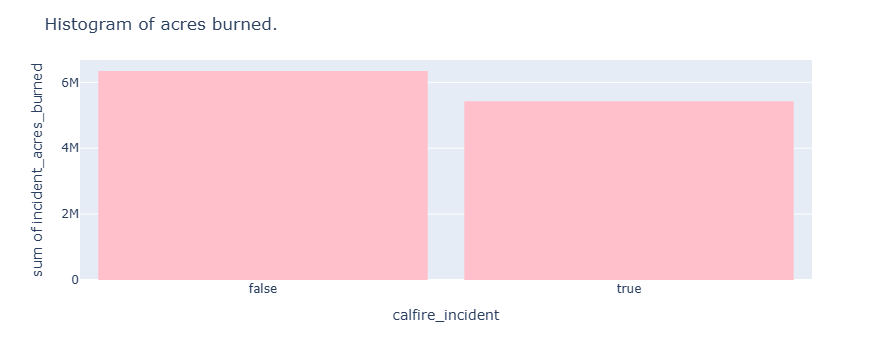

In [26]:
#3. Make a histogram of the acres burned and color the bars by whether or not the incident was a calfire incident.
#You will probably need to make a mask to remove very small and very large fires.
#How many fires burned more than 100,000 acres? What is the largest fire in the data?
fig = px.histogram(
                  DF_raw,
                  y='incident_acres_burned',
                  x='calfire_incident',
                  nbins= 6, color_discrete_sequence=['pink'])
fig.update_layout(bargap=0.1,
                  title='Histogram of acres burned.')
mask = (DF_raw['calfire_incident'])
fig.show()



In this histogram I tried to show the fires, in the first like DF_raw, we select all data and then in the x and y axis we put the information we are looking for.

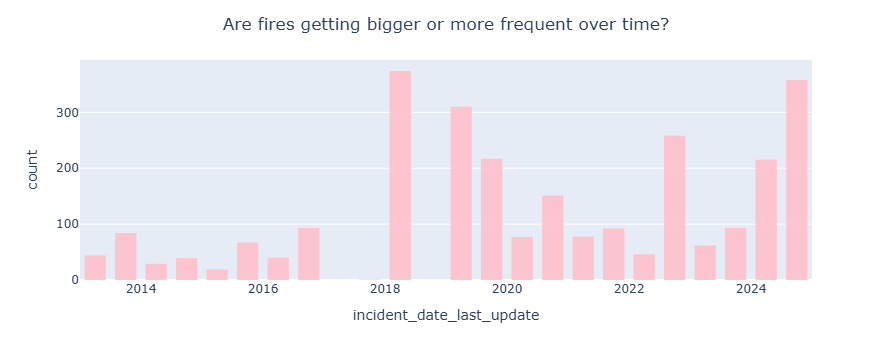

In [35]:
#4.graph that answers the question: Are fires getting bigger or more frequent over time? 
#ou get complete creative control on how to answer this question!
fig = px.histogram(DF_raw,
                   x='incident_date_last_update',
                   labels={'incident_acres_burned':'incident_acres_burned'},
                   opacity=0.9,
                   color_discrete_sequence=['pink'])
fig.update_layout(bargap=0.3, title=
            'Are fires getting bigger or more frequent over time?',
            title_x=0.5)
fig.show()


This graph shows the fires through the years, in the first lines i select the information of the dates and then the other line shows the fires.

## Try reading in some data from Wikipedia - html

Here we will explore academy award winning films. Go to the [Wiki for the List of Academy Award Winning Films](https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films). Look at what type of data is there. How many tables? Any weird looking data?

Now read the html data into Python and show the data in DF[0]

In [43]:
# Your code here
DF[0]

,Film,Year,Awards,Nominations
0,Oppenheimer,2023,7,13
1,Poor Things,2023,4,11
2,The Zone of Interest,2023,2,5
3,American Fiction,2023,1,5
4,Anatomy of a Fall,2023,1,5
...,...,...,...,...
1368,The Yankee Doodle Mouse,1943,1,1
1369,The Yearling,1946,2,7
1370,"Yesterday, Today and Tomorrow (Ieri, oggi, dom...",1964,1,1
1371,You Can't Take It with You,1938,2,7


In [41]:
# Here is some helper code
# This is code that will read in the data and then fix the Year column
my_website = "https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films"
DF = pd.read_html(my_website)
DF_raw = DF[0]
DF_raw['Year'] = DF_raw['Year'].apply(lambda x: int(x.split('/')[0]))
DF_raw['Year'].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})

,Year,count
0,1945,21
1,1949,20
2,1942,20
3,1950,19
4,1948,19
...,...,...
91,1931,10
92,1932,9
93,1928,7
94,1929,6


**Q4** Following along with the lecture notes or video, fix the data in the 'Awards' column.

In [45]:
# Your code here
award_data = DF_raw['Awards'].value_counts()
DF_award = award_data.reset_index().rename(columns={"index": "value", 0: "count"})
DF_award


,Awards,count
0,1,979
1,2,156
2,3,77
3,4,47
4,0 (1),32
5,5,25
6,7,12
7,6,12
8,1 (1),8
9,8,7


**Q5** Now try to fix the data in the "Nominations" column - see if you can do it without looking at the answer.

In [47]:
# Your code here
nom_data = DF_raw['Nominations'].value_counts()
DF_nom = nom_data.reset_index().rename(columns={"index": "value", 0: "count"})
show(DF_nom)


## Problem 1

Your homework today will be to see if you can find some data of your own. This can be the first steps you take toward your final project. 

You should:

* Find some data online
* Read that data into Python using the Pandas commands we learned
* **Look at the DataFrame - number of variables, number of observations, AND the dtypes. Comment on what you see.**

* Try to do summary statistics (.describe()). Does it work like expected?
* Attempt to fix any data, or explain why the data does not need to be fixed.
* Make some sort of graph using columns in your data.

In [63]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show


In [65]:
DF_raw = pd.read_csv('Adoptable_pets.csv')
DF_raw

,Animal ID,Intake Type,In Date,Pet name,Animal Type,Pet Age,Pet Size,Color,Breed,Sex,URL Link,Crossing
0,A518499,OWNER SUR,04/27/2024,DJ,OTHER,NO AGE,SMALL,GREEN,TURTLE / REDEARED SLIDER,F,http://www.petharbor.com/get_image.asp?res=DET...,NaN
1,A523470,OWNER SUR,09/15/2024,NORMAN,OTHER,3 YEARS,MED,TRICOLOR,GUINEA PIG,M,http://www.petharbor.com/get_image.asp?res=DET...,NaN
2,A523467,OWNER SUR,09/15/2024,RODNEY,OTHER,3 YEARS,MED,BROWN / WHITE,GUINEA PIG,M,http://www.petharbor.com/get_image.asp?res=DET...,NaN
3,A523469,OWNER SUR,09/15/2024,DEXTER,OTHER,3 YEARS,MED,AGOUTI / WHITE,GUINEA PIG,M,http://www.petharbor.com/get_image.asp?res=DET...,NaN
4,A476852,OWNER SUR,09/09/2024,TAZ,DOG,6 YEARS,MED,BLACK,AM PIT BULL TER,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN
5,A478355,OWNER SUR,09/12/2024,T-REX,DOG,8 YEARS,LARGE,BROWN / WHITE,AM PIT BULL TER / LABRADOR RETR,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN
6,A425626,OWNER SUR,09/17/2024,TOBY,DOG,8 YEARS,LARGE,TAN / WHITE,AM PIT BULL TER / MIX,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN
7,A522396,OWNER SUR,08/20/2024,*CASHMERE,DOG,3 YEARS,MED,TAN / WHITE,FEIST / MIX,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN
8,A524085,OWNER SUR,09/29/2024,*SSSSLEET,OTHER,NO AGE,MED,BROWN / BLACK,SNAKE,U,http://www.petharbor.com/get_image.asp?res=DET...,NaN
9,A524084,OWNER SUR,09/29/2024,*SSSSNOWY,OTHER,NO AGE,MED,BROWN / BLACK,SNAKE,U,http://www.petharbor.com/get_image.asp?res=DET...,NaN


In [67]:
DF_raw.shape

(50, 12)

In [69]:
DF_raw.dtypes

Animal ID      object
Intake Type    object
In Date        object
Pet name       object
Animal Type    object
Pet Age        object
Pet Size       object
Color          object
Breed          object
Sex            object
URL Link       object
Crossing       object
dtype: object

In [73]:
#Look at the DataFrame - number of variables, number of observations, AND the dtypes. Comment on what you see.

This graph has 50 rows (variables) and 12 columns (observations). I see the graph showing information about pets, like their names and basic description. On dtypes its only object.

In [166]:
#Try to do summary statistics (.describe()). Does it work like expected?
DF_raw.describe()

,Animal ID,Intake Type,In Date,Pet name,Animal Type,Pet Age,Pet Size,Color,Breed,Sex,URL Link,Crossing
count,50,50,50,50,50,50,50,50,50,50,50,8
unique,50,7,30,50,4,18,4,24,20,5,50,6
top,A518499,OWNER SUR,09/15/2024,DJ,DOG,3 YEARS,MED,BROWN / WHITE,AM PIT BULL TER,N,http://www.petharbor.com/get_image.asp?res=DET...,"7700 DEMOCRACY BLVD, BETHESDA MD 20817"
freq,1,34,7,1,22,9,30,10,10,16,1,3


Yes the code does work, it has the most basic information I think. It does do a summary so it's not as details, I think it's harder to read that way.

In [176]:
DF_raw.columns
my_columns=['Animal ID', 'Intake Type', 'In Date', 'Pet name', 'Animal Type',
       'Pet Age', 'Pet Size', 'Color', 'Breed', 'Sex',
       'Crossing']

In [178]:
#Attempt to fix any data, or explain why the data does not need to be fixed. 
DF_raw[my_columns]

,Animal ID,Intake Type,In Date,Pet name,Animal Type,Pet Age,Pet Size,Color,Breed,Sex,Crossing
0,A518499,OWNER SUR,04/27/2024,DJ,OTHER,NO AGE,SMALL,GREEN,TURTLE / REDEARED SLIDER,F,NaN
1,A523470,OWNER SUR,09/15/2024,NORMAN,OTHER,3 YEARS,MED,TRICOLOR,GUINEA PIG,M,NaN
2,A523467,OWNER SUR,09/15/2024,RODNEY,OTHER,3 YEARS,MED,BROWN / WHITE,GUINEA PIG,M,NaN
3,A523469,OWNER SUR,09/15/2024,DEXTER,OTHER,3 YEARS,MED,AGOUTI / WHITE,GUINEA PIG,M,NaN
4,A476852,OWNER SUR,09/09/2024,TAZ,DOG,6 YEARS,MED,BLACK,AM PIT BULL TER,N,NaN
5,A478355,OWNER SUR,09/12/2024,T-REX,DOG,8 YEARS,LARGE,BROWN / WHITE,AM PIT BULL TER / LABRADOR RETR,N,NaN
6,A425626,OWNER SUR,09/17/2024,TOBY,DOG,8 YEARS,LARGE,TAN / WHITE,AM PIT BULL TER / MIX,N,NaN
7,A522396,OWNER SUR,08/20/2024,*CASHMERE,DOG,3 YEARS,MED,TAN / WHITE,FEIST / MIX,N,NaN
8,A524085,OWNER SUR,09/29/2024,*SSSSLEET,OTHER,NO AGE,MED,BROWN / BLACK,SNAKE,U,NaN
9,A524084,OWNER SUR,09/29/2024,*SSSSNOWY,OTHER,NO AGE,MED,BROWN / BLACK,SNAKE,U,NaN


In this code I fixed something by deleting the row of URL Link because the data of the link is simply not need it.

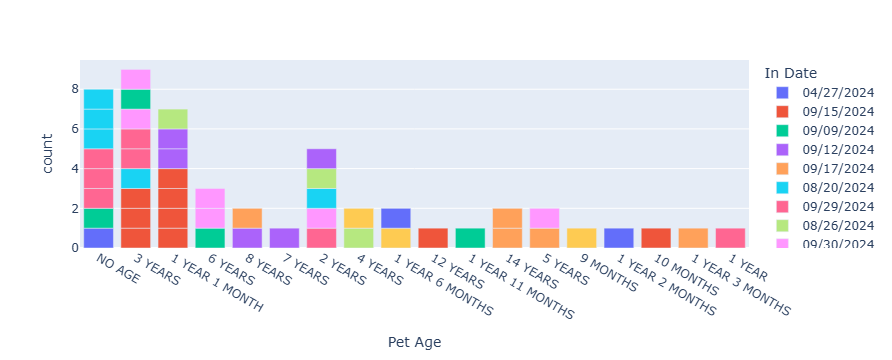

In [216]:
#Make some sort of graph using columns in your data.
px.bar(DF_raw,
             x = 'Pet Age',
            color='In Date')

In [ ]:
This graph is showing different pet ages by date.